# Intelligent Systems
## HW1
### Reza Jahani / 810198377

# Question 1

## Part 2

Cleaning the Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randint

In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
labels = data['label']
xdata = data.drop(['label'],axis=1).to_numpy()
index = (labels==7)|(labels==2)
xdata = xdata[index,:]
labels = labels[index].to_numpy()
labels[labels==7] = 1
labels[labels==2] = -1

In [ ]:
def data_splitter(xdata,labels,split):
    n = xdata.shape[0]
    data_index = np.arange(0,n)
    np.random.shuffle(data_index)
    train_index = data_index[0:int((1-split)*n)]
    test_index = data_index[int((1-split*n))+1:]
    x_train = xdata[train_index]
    x_test = xdata[test_index]
    y_train = labels[train_index]
    y_test = labels[test_index]
    return x_train,x_test,y_train,y_test

In [ ]:
train_test_split = 0.1
x_train,x_test,y_train,y_test = data_splitter(xdata,labels,train_test_split)

Functions

In [ ]:
def miu(w,b,x,y):
    return 1/(1+np.exp(-y*(b+np.dot(x,w))))

def grad(w,b,X,Y):
    n = X.shape[0]
    m = X.shape[1]
    grad_w = np.zeros(m)
    grad_b = 0
    for i in range(n):
        grad_w = grad_w + (1-miu(w,b,X[i],Y[i]))*(Y[i])*X[i]
        grad_b = grad_b + (1-miu(w,b,X[i],Y[i]))*Y[i]
    grad_b = -1/n * grad_b
    grad_w = -1/n * grad_w
    return grad_w,grad_b

def cost_function(w,b,X,Y):
    n = X.shape[0]
    cost = 0
    for i in range(n):
        temp = np.log(1+np.exp(-Y[i]*(b+np.dot(X[i],w))))
        cost = cost + temp
    cost = cost/n
    return cost

In [ ]:
def learn_model(X,Y,num_iteration,learning_rate):
    m = X.shape[1]
    J = []
    w = np.zeros(m)
    b = 0
    for iter in range(num_iteration):
        loss = cost_function(w,b,X,Y)
        J.append(loss)
        dw,db = grad(w,b,X,Y)
        w = w - learning_rate*dw
        b = b - learning_rate*db
    return w,b,J

Model

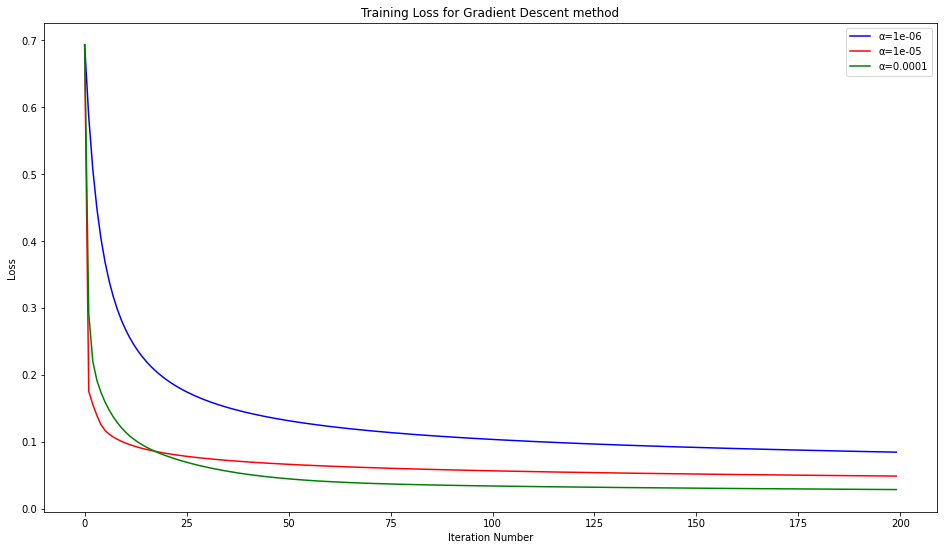

In [ ]:
iterations = 200
X = x_train
Y = y_train
w1,b1,J1 = learn_model(X,Y,iterations,1e-6)
w2,b2,J2 = learn_model(X,Y,iterations,1e-5)
w3,b3,J3 = learn_model(X,Y,iterations,1e-4)
plt.figure(figsize=(16,9))
plt.plot(range(iterations),J1,'b',label=f'\u03B1={1e-6}')
plt.plot(range(iterations),J2,'r',label=f'\u03B1={1e-5}')
plt.plot(range(iterations),J3,'g',label=f'\u03B1={1e-4}')
plt.xlabel('Iteration Number')
plt.ylabel('Loss')
plt.title('Training Loss for Gradient Descent method')
plt.legend()

## Part 3

In [ ]:
def model_predict(x,w,b):
    y_hat = np.dot(x,w) + b
    if y_hat > 0:
        return 1
    else:
        return -1

In [ ]:
def accuracy(y,y_hat):
    n = len(y)
    similarity_array = np.zeros(n)
    similarity_array[y==y_hat] = 1
    acc = np.sum(similarity_array)/n
    return acc

In [ ]:
X = x_train
n = X.shape[0]
y_hat_1 = []
y_hat_2 = []
y_hat_3 = []
for i in range(n):
    y_hat_1.append(model_predict(X[i],w1,b1))
    y_hat_2.append(model_predict(X[i],w2,b2))
    y_hat_3.append(model_predict(X[i],w3,b3))
y_hat_1 = np.array(y_hat_1)
y_hat_2 = np.array(y_hat_2)
y_hat_3 = np.array(y_hat_3)

In [ ]:
accuracy_model_1 = round(accuracy(y_hat_1,y_train),4)
accuracy_model_2 = round(accuracy(y_hat_2,y_train),3)
accuracy_model_3 = round(accuracy(y_hat_3,y_train),3)
print("Accuracy of Training Data:")
print(f"Model 1: {accuracy_model_1*100}%")
print(f"Model 2: {accuracy_model_2*100}%")
print(f"Model 3: {accuracy_model_3*100}%")

Accuracy of Training Data:
Model 1: 97.53%
Model 2: 98.5%
Model 3: 99.1%


In [ ]:
X = x_test
n = X.shape[0]
y_hat_1 = []
y_hat_2 = []
y_hat_3 = []
for i in range(n):
    y_hat_1.append(model_predict(X[i],w1,b1))
    y_hat_2.append(model_predict(X[i],w2,b2))
    y_hat_3.append(model_predict(X[i],w3,b3))
y_hat_1 = np.array(y_hat_1)
y_hat_2 = np.array(y_hat_2)
y_hat_3 = np.array(y_hat_3)
accuracy_model_1 = round(accuracy(y_hat_1,y_test),4)
accuracy_model_2 = round(accuracy(y_hat_2,y_test),4)
accuracy_model_3 = round(accuracy(y_hat_3,y_test),3)
print("Accuracy of Test Data:")
print(f"Model 1: {accuracy_model_1*100}%")
print(f"Model 2: {accuracy_model_2*100}%")
print(f"Model 3: {accuracy_model_3*100}%")

Accuracy of Test Data:
Model 1: 97.31%
Model 2: 97.89%
Model 3: 98.6%


## Part 4

In this section we aim to implement the second and third part with stochastic gradient descent.

In [ ]:
def stochastic_grad(w,b,x,y):
    grad_w = -(1-miu(w,b,x,y))*(y)*x
    grad_b = -(1-miu(w,b,x,y))*(y)
    return grad_w,grad_b

In [ ]:
def learn_sdg_model(X,Y,num_iteration,learning_rate):
    n = X.shape[0]
    m = X.shape[1]
    J = []
    w = np.zeros(m)
    b = 0
    for iter in range(num_iteration):   
        loss = cost_function(w,b,X,Y)
        J.append(loss)
        for j in range(n):
            dw,db = stochastic_grad(w,b,X[j],Y[j])
            w = w - learning_rate*dw
            b = b - learning_rate*db
    return w,b,J

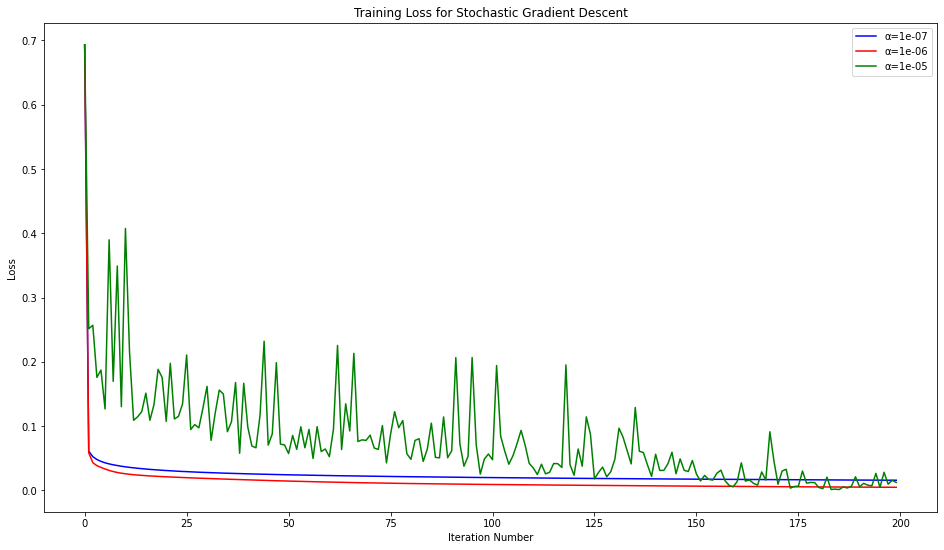

In [ ]:
iterations = 200
X = x_train
Y = y_train
w1,b1,J1 = learn_sdg_model(X,Y,iterations,1e-7)
w2,b2,J2 = learn_sdg_model(X,Y,iterations,1e-6)
w3,b3,J3 = learn_sdg_model(X,Y,iterations,1e-5)
plt.figure(figsize=(16,9))
plt.plot(range(iterations),J1,'b',label=f'\u03B1={1e-7}')
plt.plot(range(iterations),J2,'r',label=f'\u03B1={1e-6}')
plt.plot(range(iterations),J3,'g',label=f'\u03B1={1e-5}')
plt.xlabel('Iteration Number')
plt.ylabel('Loss')
plt.title('Training Loss for Stochastic Gradient Descent')
plt.legend()

In [ ]:
X = x_train
n = X.shape[0]
y_hat_1 = []
y_hat_2 = []
y_hat_3 = []
for i in range(n):
    y_hat_1.append(model_predict(X[i],w1,b1))
    y_hat_2.append(model_predict(X[i],w2,b2))
    y_hat_3.append(model_predict(X[i],w3,b3))
y_hat_1 = np.array(y_hat_1)
y_hat_2 = np.array(y_hat_2)
y_hat_3 = np.array(y_hat_3)
accuracy_model_1 = round(accuracy(y_hat_1,y_train),3)
accuracy_model_2 = round(accuracy(y_hat_2,y_train),3)
accuracy_model_3 = round(accuracy(y_hat_3,y_train),4)
print("Accuracy of Train data:")
print(f"Model 1 :{accuracy_model_1*100}%")
print(f"Model 2 :{accuracy_model_2*100}%")
print(f"Model 3 :{accuracy_model_3*100}%")

Accuracy of Train data:
Model 1 :99.6%
Model 2 :99.9%
Model 3 :99.92%


In [ ]:
X = x_test
n = X.shape[0]
y_hat_1 = []
y_hat_2 = []
y_hat_3 = []
for i in range(n):
    y_hat_1.append(model_predict(X[i],w1,b1))
    y_hat_2.append(model_predict(X[i],w2,b2))
    y_hat_3.append(model_predict(X[i],w3,b3))
y_hat_1 = np.array(y_hat_1)
y_hat_2 = np.array(y_hat_2)
y_hat_3 = np.array(y_hat_3)
accuracy_model_1 = round(accuracy(y_hat_1,y_test),3)
accuracy_model_2 = round(accuracy(y_hat_2,y_test),3)
accuracy_model_3 = round(accuracy(y_hat_3,y_test),4)
print("Accuracy of Test data:")
print(f"Model 1 :{accuracy_model_1*100}%")
print(f"Model 2 :{accuracy_model_2*100}%")
print(f"Model 3 :{accuracy_model_3*100}%")

Accuracy of Test data:
Model 1 :97.8%
Model 2 :97.8%
Model 3 :97.78%


Now we use the mini batch gradient descent approach for optimization.

In [ ]:
def learn_mbgd_model(X,Y,num_iteration,learning_rate,n_batch):
    n = X.shape[0]
    m = X.shape[1]
    J = []
    w = np.zeros(m)
    b = 0
    for iter in range(num_iteration):   
        loss = cost_function(w,b,X,Y)
        J.append(loss)
        batch_index = np.random.randint(0,n,n_batch)
        x_data = X[batch_index]
        y_data = Y[batch_index]
        dw,db = grad(w,b,x_data,y_data)
        w = w - learning_rate*dw
        b = b - learning_rate*db
    return w,b,J

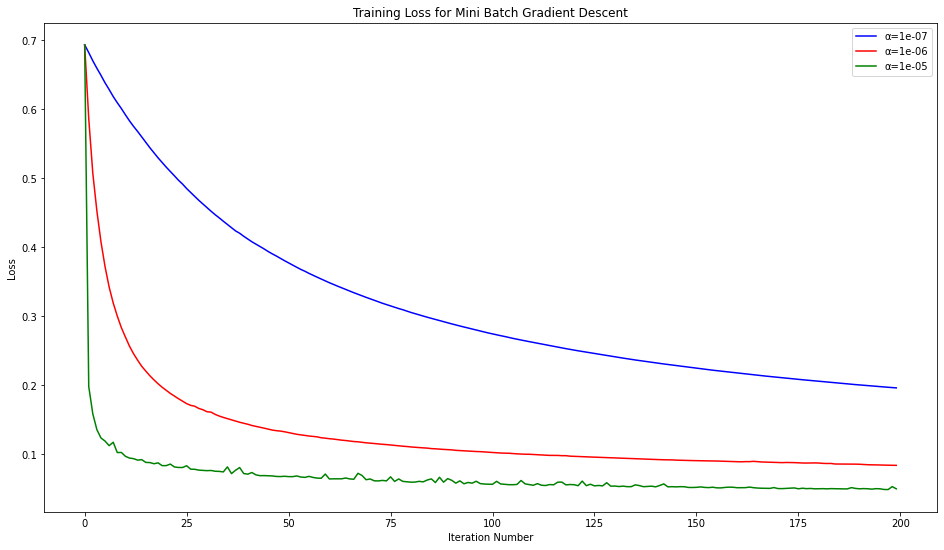

In [ ]:
iterations = 200
X = x_train
Y = y_train
w1,b1,J1 = learn_mbgd_model(X,Y,iterations,1e-7,100)
w2,b2,J2 = learn_mbgd_model(X,Y,iterations,1e-6,100)
w3,b3,J3 = learn_mbgd_model(X,Y,iterations,1e-5,100)
plt.figure(figsize=(16,9))
plt.plot(range(iterations),J1,'b',label=f'\u03B1={1e-7}')
plt.plot(range(iterations),J2,'r',label=f'\u03B1={1e-6}')
plt.plot(range(iterations),J3,'g',label=f'\u03B1={1e-5}')
plt.xlabel('Iteration Number')
plt.ylabel('Loss')
plt.title('Training Loss for Mini Batch Gradient Descent')
plt.legend()

In [ ]:
X = x_train
n = X.shape[0]
y_hat_1 = []
y_hat_2 = []
y_hat_3 = []
for i in range(n):
    y_hat_1.append(model_predict(X[i],w1,b1))
    y_hat_2.append(model_predict(X[i],w2,b2))
    y_hat_3.append(model_predict(X[i],w3,b3))
y_hat_1 = np.array(y_hat_1)
y_hat_2 = np.array(y_hat_2)
y_hat_3 = np.array(y_hat_3)
accuracy_model_1 = round(accuracy(y_hat_1,y_train),3)
accuracy_model_2 = round(accuracy(y_hat_2,y_train),4)
accuracy_model_3 = round(accuracy(y_hat_3,y_train),4)
print("Accuracy of Train Data:")
print(f"Model 1 :{accuracy_model_1*100}%")
print(f"Model 2 :{accuracy_model_2*100}%")
print(f"Model 3 :{accuracy_model_3*100}%")

Accuracy of Train Data:
Model 1 :96.5%
Model 2 :97.44%
Model 3 :98.56%


In [ ]:
X = x_test
n = X.shape[0]
y_hat_1 = []
y_hat_2 = []
y_hat_3 = []
for i in range(n):
    y_hat_1.append(model_predict(X[i],w1,b1))
    y_hat_2.append(model_predict(X[i],w2,b2))
    y_hat_3.append(model_predict(X[i],w3,b3))
y_hat_1 = np.array(y_hat_1)
y_hat_2 = np.array(y_hat_2)
y_hat_3 = np.array(y_hat_3)
accuracy_model_1 = round(accuracy(y_hat_1,y_test),4)
accuracy_model_2 = round(accuracy(y_hat_2,y_test),4)
accuracy_model_3 = round(accuracy(y_hat_3,y_test),5)
print("Accuracy of Test Data:")
print(f"Model 1 :{accuracy_model_1*100}%")
print(f"Model 2 :{accuracy_model_2*100}%")
print(f"Model 3 :{accuracy_model_3*100}%")

Accuracy of Test Data:
Model 1 :96.37%
Model 2 :97.19%
Model 3 :98.363%


# Question 2

## Part 2

Employing the Newton method for finding the minimum point.

In [20]:
from numpy import pi
from numpy.linalg import inv

Functions

In [34]:
def f(x1,x2):
    val = 2*x1**2 + 2*x2**2 - 17*x2*np.cos(0.2*pi*x1) - x1*x2
    return val

def gradient(x1,x2):
    grad_x1 = 4*x1 + 3.4*pi*x2*np.sin(0.2*pi*x1) - x2
    grad_x2 = 4*x2 - 17*np.cos(0.2*pi*x1) - x1
    grad = np.array([grad_x1,grad_x2])
    return grad

def hessian(x1,x2):
    h11 = 4 + 3.4*pi*x2*np.cos(0.2*pi*x1)
    h12 = 3.4*pi*np.sin(0.2*pi*x1) - 1
    h21 = 3.4*pi*np.sin(0.2*pi*x1) - 1
    h22 = 4
    H = np.array([[h11,h12],
                  [h21,h22]])
    return H

In [43]:
def newton_opt(x1_0,x2_0,num_iteration):
    f_val = []
    x1 = x1_0
    x2 = x2_0
    for i in range(num_iteration):
        function_value = f(x1,x2)
        f_val.append(function_value)
        grad_f = gradient(x1,x2)
        H_f = hessian(x1,x2)
        H_f_inverse = inv(H_f)
        x_update_val = np.dot(H_f_inverse,grad_f)
        x1 = x1 - x_update_val[0]
        x2 = x2 - x_update_val[1]
    return x1,x2,f_val

Using newton method to reach the minimum point.

In [ ]:
x1_0 = 1
x2_0 = 3
num_iteration = 20
x1_final,x2_final,f_val = newton_opt(x1_0,x2_0,num_iteration)
print(f"Final point after optimization: x=({np.round(x1_final,2)},{np.round(x2_final,2)})")
print(f"Minimum value of the function: f={np.round(f_val[-1],2)}")

Final point after optimization: x=(0.13,4.27)
Minimum value of the function: f=-36.4


In [ ]:
step_size = 0.5
thresholds = [50,250]
x1 = np.arange(-5,5,step_size)
x2 = np.arange(0,10,step_size)
f_min = f_val[-1]
d_type = []
for i in range(len(x1)):
    d_temp = []
    for j in range(len(x2)):
        func_val = f(x1[i],x2[j])
        distance = abs(func_val - f_min)
        if distance < thresholds[0]:
            d_temp.append('Close')
        if distance >= thresholds[0] and distance <= thresholds[1]:
            d_temp.append('Far')
        if distance > thresholds[1]:
            d_temp.append('Farther')
    d_type.append(d_temp)
d_type = np.array(d_type)

In [ ]:
x1_close = x1[np.where(d_type=='Close')[0]]
x2_close = x2[np.where(d_type=='Close')[1]]
x1_far = x1[np.where(d_type=='Far')[0]]
x2_far = x2[np.where(d_type=='Far')[1]]
x1_farther = x1[np.where(d_type=='Farther')[0]]
x2_farther = x2[np.where(d_type=='Farther')[1]]

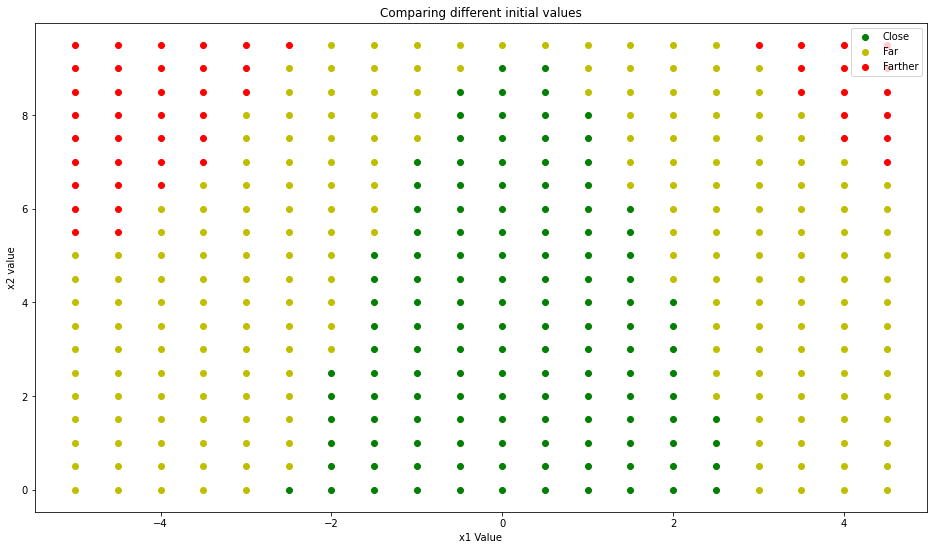

In [ ]:
plt.figure(figsize=(16,9))
plt.scatter(x1_close,x2_close,label='Close',color='g',marker='o')
plt.scatter(x1_far,x2_far,label='Far',color='y',marker='o')
plt.scatter(x1_farther,x2_farther,label='Farther',color='r',marker='o')
plt.title('Comparing different initial values')
plt.xlabel('x1 Value')
plt.ylabel('x2 value')
plt.legend()

## Part 3

Using the genetic algorithm to find the optimium solutions.

In [22]:
import random
import numpy as np
from numpy import pi

In [46]:
def func(x1,x2):
    val = 2*x1**2 + 2*x2**2 - 17*x2*np.cos(0.2*pi*x1) - x1*x2 + 36.4
    return val

def fittness(x1,x2):
    function_val = func(x1,x2)
    if function_val == 0:
        return 99999
    else:
        return abs(1/function_val)

num_solutions = 1000
solutions = []
for i in range(num_solutions):
    x1_s = random.uniform(-10,10)
    x2_s = random.uniform(-10,20)
    s = [x1_s,x2_s]
    solutions.append(s)

num_generation = 10000
for i in range(num_generation):
    ranked_sol = []
    for j in range(len(solutions)):
        s = solutions[j]
        f = fittness(s[0],s[1])
        ranked_sol.append([f,s])
    ranked_sol.sort(reverse=True)

    if ranked_sol[0][0] > 99998:
        break

    best_sol = ranked_sol[:100]
    elements = []
    for s in best_sol:
        elements.append(s[1][0])
        elements.append(s[1][1])

    new_generation = []
    for m in range(10000):
        new_generation.append([random.choice(elements)*random.uniform(0.99,1.01),random.choice(elements)*random.uniform(0.99,1.01)])
    
    solutions = new_generation

x = ranked_sol[0][1]
x1 = x[0]
x2 = x[1]
func_val_min = func(x1,x2) - 36.4
print("Optimum solution is:")
print(f"x=({np.round(x1,2)},{np.round(x2,2)})")
print("Function value is:")
print(f"f(x) = {np.round(func_val_min,2)}")

Optimum solution is:
x=(0.12,4.27)
Function value is:
f(x) = -36.4


# Question 3

## Part 3

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data[:,:2]
label = iris.target

In [ ]:
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
svc = svm.SVC(kernel='linear')
model = OneVsRestClassifier(svc)
model.fit(data,label)

OneVsRestClassifier(estimator=SVC(kernel='linear'))

Below the decission boundary is plotted.

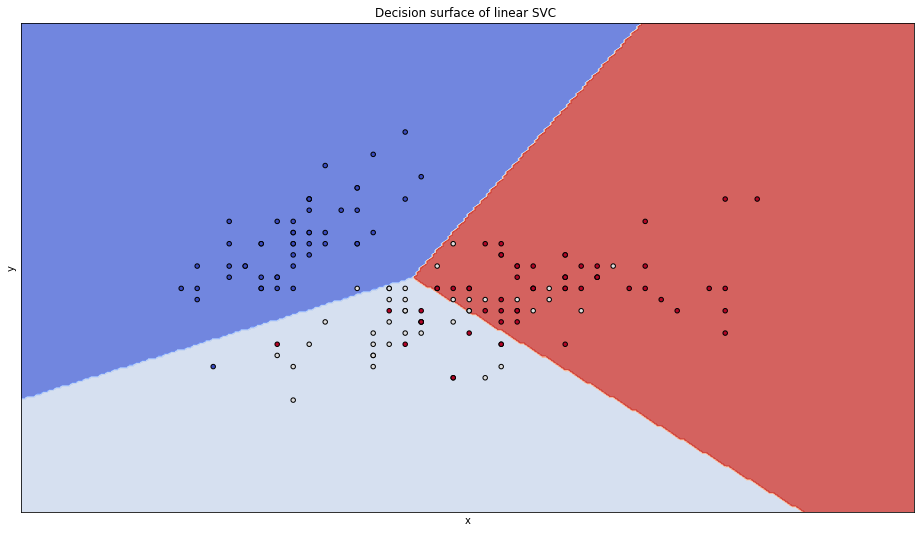

In [ ]:
# This functions are picked from this reference: https://stackoverflow.com/questions/51297423/plot-scikit-learn-sklearn-svm-decision-boundary-surface
import matplotlib.pyplot as plt
import numpy as np
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots(figsize=(16,9))
title = ('Decision surface of linear SVC ')
X0, X1 = data[:, 0], data[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=label, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

Accuracy, Confusion Matrix, Confidence Matrix

Model's Accuracy: 78.67% 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


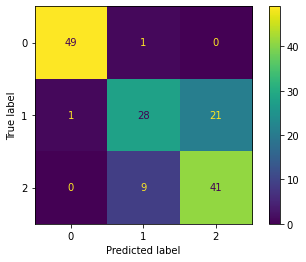



The Confidence Matrix:
x-axis: Predicted Labels / y-axis: True Labels
0     0.33  0.01  0.0
1     0.01  0.19  0.14
2     0.0  0.06  0.27
.        0    1   2


In [ ]:
y_true = label
y_predicted = model.predict(data)
accuracy = metrics.accuracy_score(y_true,y_predicted)
print(f"Model's Accuracy: {np.round(accuracy*100,2)}% \n")

plot_confusion_matrix(model,data,label)
plt.show()

print("\n")
n = len(label)
cm = np.array([[49/n,1/n,0/n],
               [1/n,28/n,21/n],
               [0/n,9/n,41/n]])
print("The Confidence Matrix:")
print("x-axis: Predicted Labels / y-axis: True Labels")
for i in range(3):
    print(f"{i}     {np.round(cm[i][0],2)}  {np.round(cm[i][1],2)}  {np.round(cm[i][2],2)}")
print(".        0    1   2")